chain summary (feasible & unfeasible ratio, always_accept function)
optimizer summary (solver results for the best state)

algorithm

In [ ]:
from uav_routing.data import plot_graph_with_positions
import pandas as pd
import math 
    
def text_to_pandas(path):
    data_rows_list = []
    with open(path, 'r') as file:
        # Read the metadata (optional, just to consume the lines)
        first_line = file.readline() 
        second_line = file.readline()
        
        # Process the main data block
        for line in file:
            stripped_line = line.strip()
            if stripped_line:
                # Split using whitespace as delimiter
                fields = stripped_line.split()
                data_rows_list.append(fields)
        
        df = pd.DataFrame(data_rows_list)
            
    return df

def process_data(df):
    
    nodes = {}
    
    for index, row in df.iterrows():
        if len(row) != 10:
            print("length", len(row))
            print("row", row)
        
        if index == 0:
            base = row[0]
            camp_time = row[8]
            
        node_id = row[0]
        position = (float(row[1]), float(row[2]))
        surv_time = row[3]
        max_info = row[4]
        time_window = [row[8], row[9]]
        #slope = (info_at_highest - info_at_lowest) / (highest - lowest)
        
        nodes[node_id] = {
                        "position":position,
                        #"info_at_lowest":info_at_lowest, 
                        #"info_slope":slope,
                        "time_window":time_window,
                        "surv_time": surv_time,
                        "max_info": max_info
                    }
        

        metadata = {
                    "base": 0, 
                    "campaign_time": camp_time, 
                #"max_energy": , 
                    #"speed_min": , 
                    #"speed_max": ,
                    }
    return nodes, metadata


def calculate_distances(nodes):
    distances = {}
    for u in nodes:
        for v in nodes:
            if u!=v:
                point1, point2 = nodes[u]["position"], nodes[v]["position"]
                distance = math.dist(point1, point2)
                distances[(u,v)] = distance
                distances[(v,u)] = distances[(u,v)]
    return distances

In [2]:
path = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/50_c101.txt"
path_2 = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/50_r101.txt"
path_3 = "/Users/kirtisoglu/Documents/GitHub/UAV-Routing/datasets/50_rc101.txt"

df_c= text_to_pandas(path)
df_r = text_to_pandas(path_2)
df_rc = text_to_pandas(path_3)
nodes_c, metadata_c = process_data(df_c)
nodes_r, metadata_r = process_data(df_r)
nodes_rc, metadata_rc = process_data(df_rc)
distances_c = calculate_distances(nodes_c)
distances_r = calculate_distances(nodes_r)
distances_rc = calculate_distances(nodes_rc)

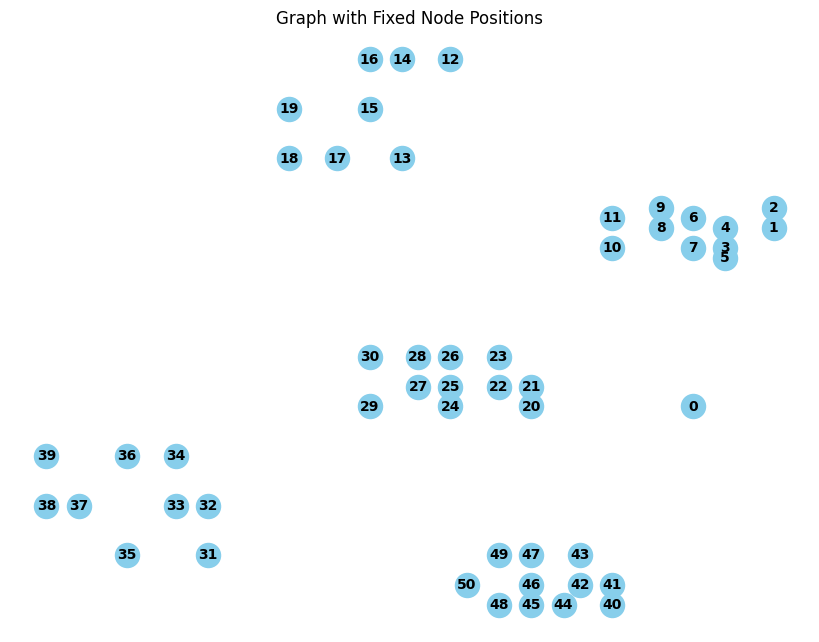

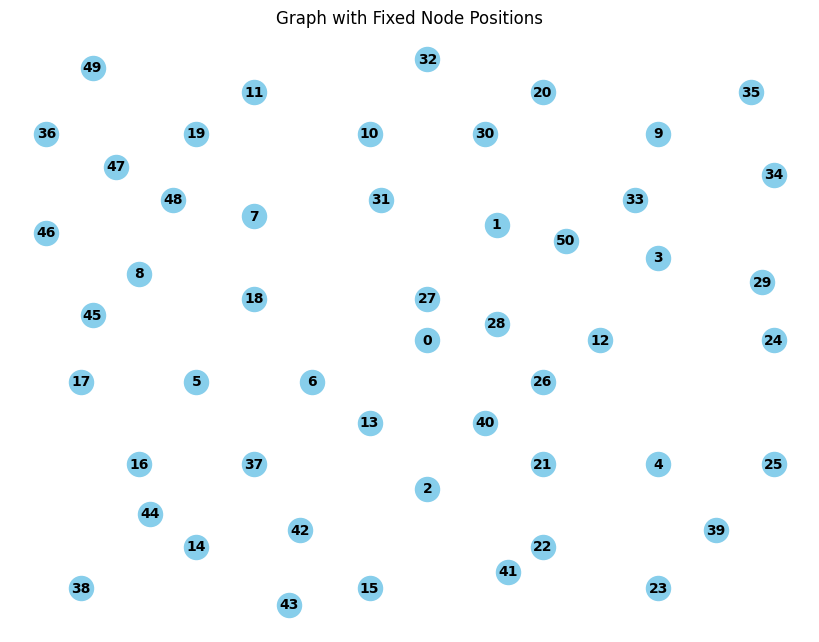

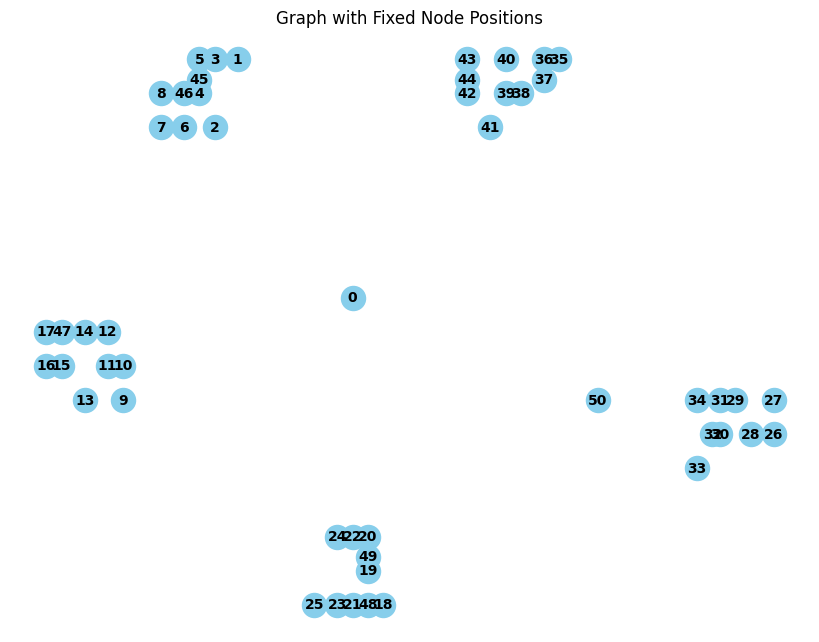

In [3]:
plot_graph_with_positions(nodes_c, [])
plot_graph_with_positions(nodes_r, [])
plot_graph_with_positions(nodes_rc, [])